In [1]:
import requests
url= "http://www.ebi.ac.uk/Tools/webservices/psicquic/intact/webservices/current/search/query/pubid:17446270"
try:
    httpReq = requests.get(url, proxies=None)
    print(httpReq.url)
except NameError:
    httpReq = requests.get(url)
ans=httpReq.content

http://www.ebi.ac.uk/Tools/webservices/psicquic/intact/webservices/current/search/query/pubid:17446270


In [2]:
import pandas
import io
dataframe = pandas.read_csv(io.StringIO(ans.decode('utf-8')), sep="\t", header=None)

In [3]:
set(dataframe[6])

{'psi-mi:"MI:0018"(two hybrid)',
 'psi-mi:"MI:0096"(pull down)',
 'psi-mi:"MI:0397"(two hybrid array)'}

In [4]:
import re
ids = list(set(dataframe[10]))
ids=(ids[0], ids[2], ids[3]) # no human allowed
valid=list()
interact_virus=list()
interact_human=list()

for i in dataframe.iterrows():
    if i[1][10] in ids and i[1][9] in ids:
        interact_virus.append((i[1][0].split(":")[1], i[1][1].split(":")[1]))
    else:
        interact_human.append((i[1][0].split(":")[1], i[1][1].split(":")[1]))

In [5]:
interact_virus

[('P0CW72', 'P0CW72'),
 ('P0C704', 'P14348'),
 ('P03185', 'P0CK47'),
 ('P0C731', 'Q3KSQ2'),
 ('P0CK53', 'A0A0C7TRZ7'),
 ('P0CK47', 'P03185'),
 ('Q3KST5', 'Q66542'),
 ('Q3KSS4', 'Q3KSS4'),
 ('P03209', 'Q3KSP5'),
 ('Q3KSP5', 'Q3KSP5'),
 ('P0CW72', 'Q3KSU8'),
 ('Q3KSU1', 'Q3KSU1'),
 ('Q3KSV2', 'P03206'),
 ('Q3KST2', 'Q3KSV2'),
 ('Q3KSU8', 'Q3KSU8'),
 ('Q3KSV2', 'P03225'),
 ('Q3KSU5', 'P0C704'),
 ('Q3KST2', 'Q3KST2'),
 ('P0C729', 'Q3KSS5'),
 ('Q3KST2', 'Q69119'),
 ('Q3KST0', 'Q3KSQ2'),
 ('Q3KSU5', 'P0CK58'),
 ('P03208', 'Q3KSQ2'),
 ('Q3KSQ2', 'P03209'),
 ('Q69131', 'P0C738'),
 ('P0C701', 'Q66542'),
 ('P0CK49', 'Q3KSR9'),
 ('P0C734', 'P0C6Z5'),
 ('Q3KSS3', 'A8CSJ8'),
 ('P03199', 'Q69139'),
 ('P03208', 'Q3KSS4'),
 ('P0C6Z4', 'A8CSJ8'),
 ('P0CW72', 'P0C6Z4'),
 ('A8CSJ8', 'P03199'),
 ('Q3KSU3', 'Q69139'),
 ('P03208', 'P03232'),
 ('P03208', 'P0CW72'),
 ('Q3KST1', 'P0C762'),
 ('Q69119', 'Q3KSS4'),
 ('P0C704', 'A8CSJ8'),
 ('P0CW72', 'P0CW72'),
 ('P14348', 'P0CW72'),
 ('P0CK47', 'P03185'),
 ('P0CK

<IPython.core.display.Javascript object>


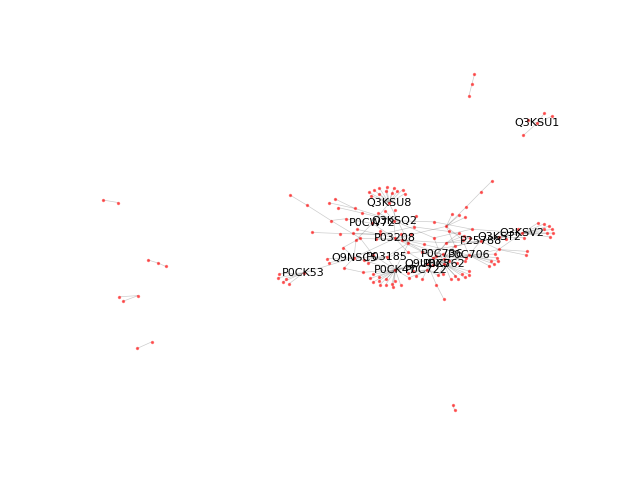

{'P0CW72': Text(-0.09679610717352666, 0.10307930307797797, 'P0CW72'),
 'P03185': Text(-0.05517703556415681, -0.09272944838823048, 'P03185'),
 'P0CK53': Text(-0.2970928095785852, -0.18846932714797104, 'P0CK53'),
 'P0CK47': Text(-0.029778089907310745, -0.17021788802353907, 'P0CK47'),
 'Q3KSU1': Text(0.383187760424865, 0.694540674938126, 'Q3KSU1'),
 'Q3KSV2': Text(0.34025184583446644, 0.04667638428028926, 'Q3KSV2'),
 'Q3KST2': Text(0.272898817071032, 0.02197108399594665, 'Q3KST2'),
 'Q3KSU8': Text(-0.047528266008299506, 0.22312572473102005, 'Q3KSU8'),
 'P03208': Text(-0.02959928296584008, 0.015599223064771297, 'P03208'),
 'Q3KSQ2': Text(-0.033541653671095725, 0.11954141278425638, 'Q3KSQ2'),
 'Q9UBX5': Text(0.06414672691605794, -0.1368494411104572, 'Q9UBX5'),
 'P0C762': Text(0.1130813666355037, -0.136324124308831, 'P0C762'),
 'Q9NSC5': Text(-0.14969228498865267, -0.09836901588207263, 'Q9NSC5'),
 'P25788': Text(0.21909766625197077, -0.0006983724319202132, 'P25788'),
 'P0C736': Text(0.108220

In [48]:
%matplotlib nbagg
import networkx as nx
import matplotlib.pyplot as plt

plt.figure()
plt.axis('off')
G = nx.Graph()
neighbors=dict()

for couple in interact_virus:
    G.add_edge(couple[0],couple[1])
    if couple[0] not in neighbors:
        neighbors[couple[0]]=list()
    neighbors[couple[0]].append(couple[1])

labels=dict()
display_nodes=list()
for i in neighbors:
    if len(neighbors[i]) > 3:
        labels[i]=i
        display_nodes.append(i)

pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_color="red",  node_shape="o", node_size=2, alpha=0.5)
nx.draw_networkx_labels(G,pos,font_size=8,font_color='black', labels=labels)